# Classifiers Applied to Liver Disorders Dataset

Liver Disorders Dataset: https://archive.ics.uci.edu/dataset/60/liver+disorders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
def evaluate_classifier(classifier, param_grid, X_train, X_test, y_train, y_test, stratified_kfold, classifier_name):
    
    # Function to evaluate a classifier using GridSearchCV and return best parameters and accuracy.
    
    grid_search = GridSearchCV(classifier, param_grid, cv=stratified_kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    plot_heatmap(grid_search, param_grid, f'{classifier_name} Hyperparameters Heatmap')
    return accuracy, grid_search.best_params_

In [3]:
def plot_heatmap(grid_search, params, title):
    
    # Function to plot heatmap for GridSearchCV results.

    scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(params[list(params)[0]]), len(params[list(params)[1]]))
    plt.figure(figsize=(12, 6))
    sns.heatmap(scores_matrix, annot=True, fmt='.3f', 
                xticklabels=params[list(params)[0]], 
                yticklabels=params[list(params)[1]])
    plt.xlabel(list(params)[0])
    plt.ylabel(list(params)[1])
    plt.title(title)
    plt.show()

In [4]:
# Load the dataset
data_file_path = 'bupa.data'  
data = pd.read_csv(data_file_path, header=None)
data.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']

In [5]:
# Define data partitions
partitions = {'20/80': 0.2, '50/50': 0.5, '80/20': 0.8}

In [6]:
# StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

In [7]:
# Results dictionary
results = {'Classifier': [], 'Partition': [], 'Accuracy': [], 'Best Parameters': []}

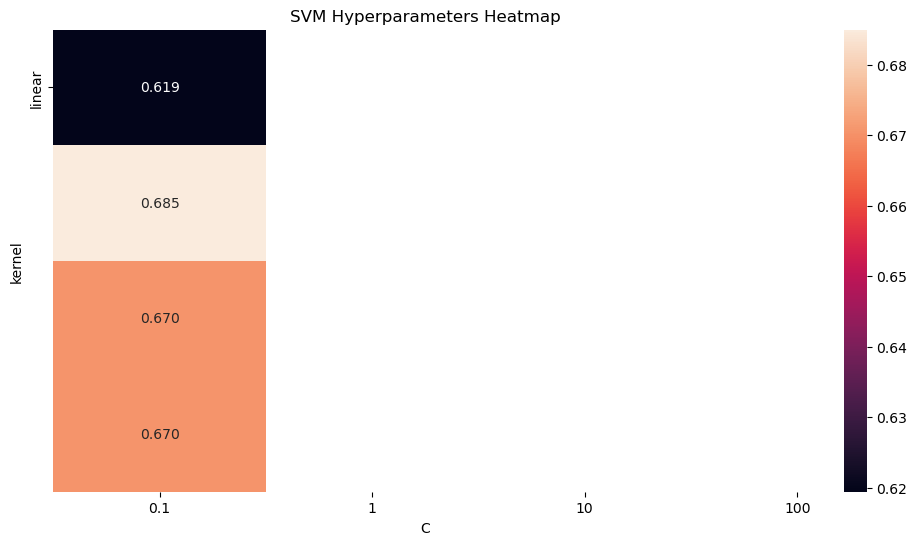

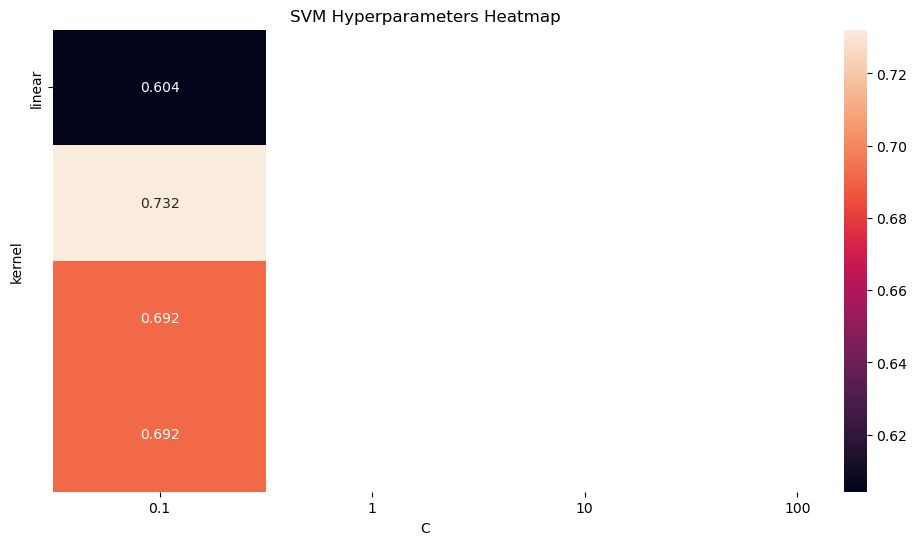

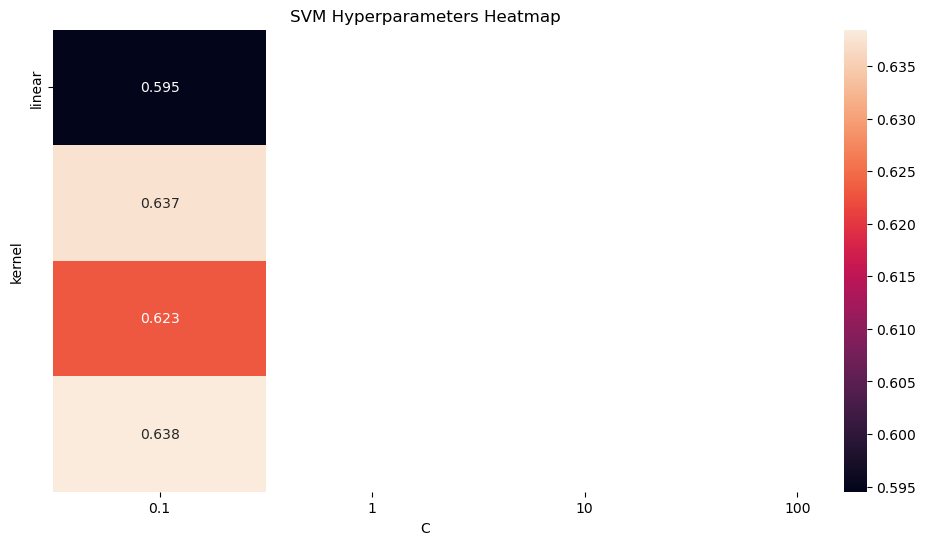

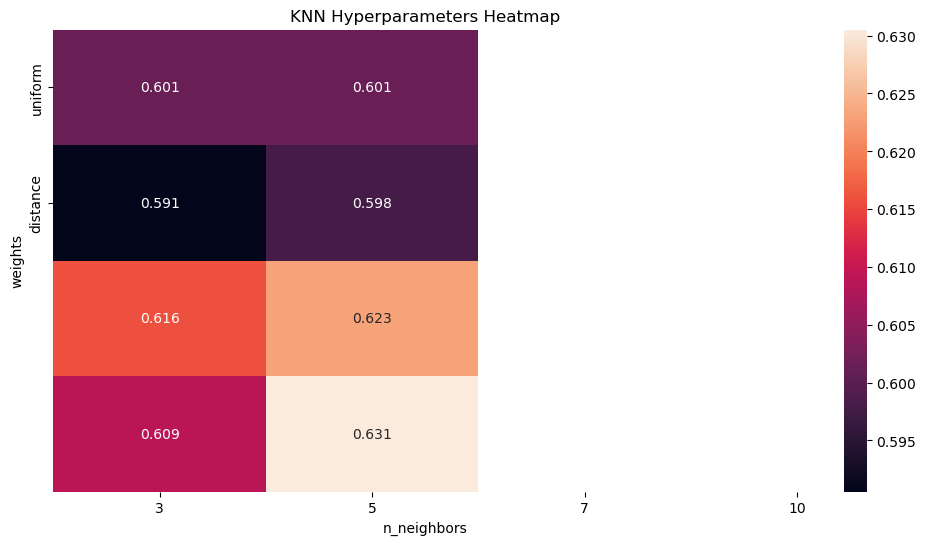

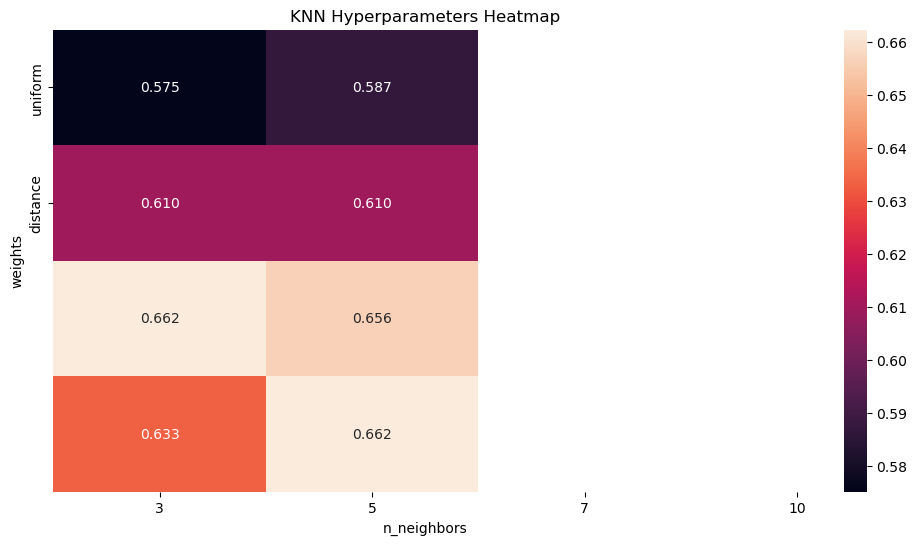

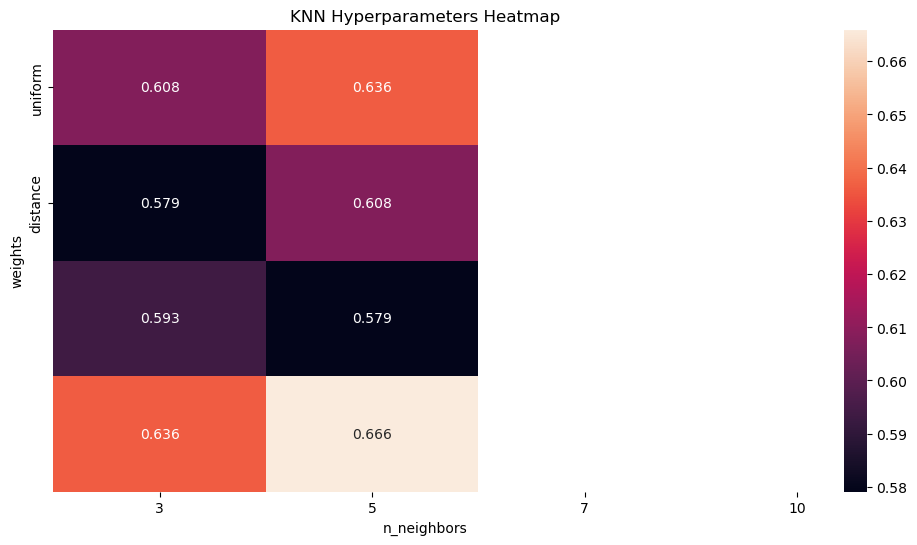

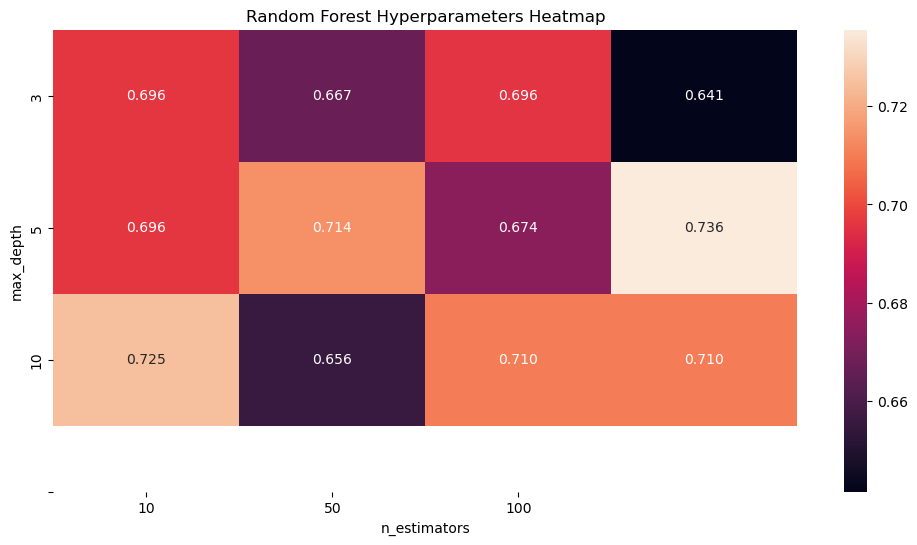

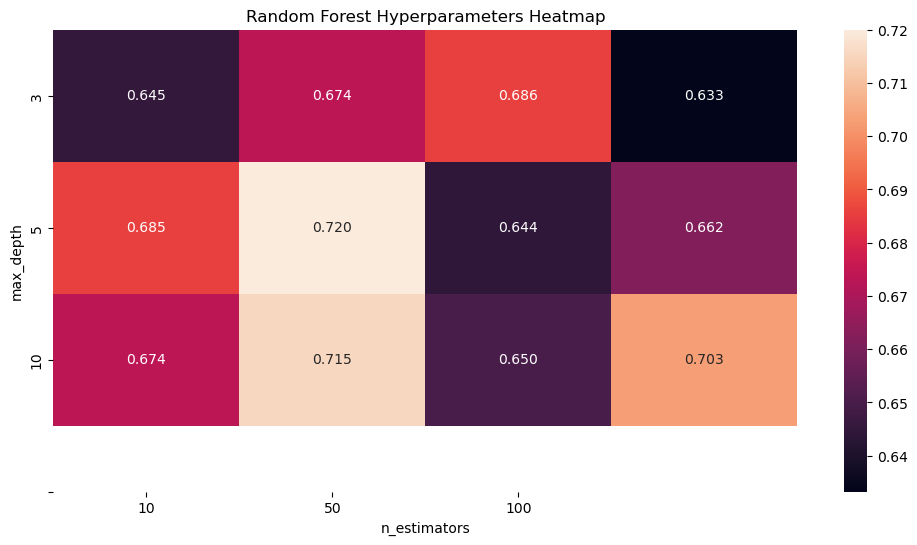

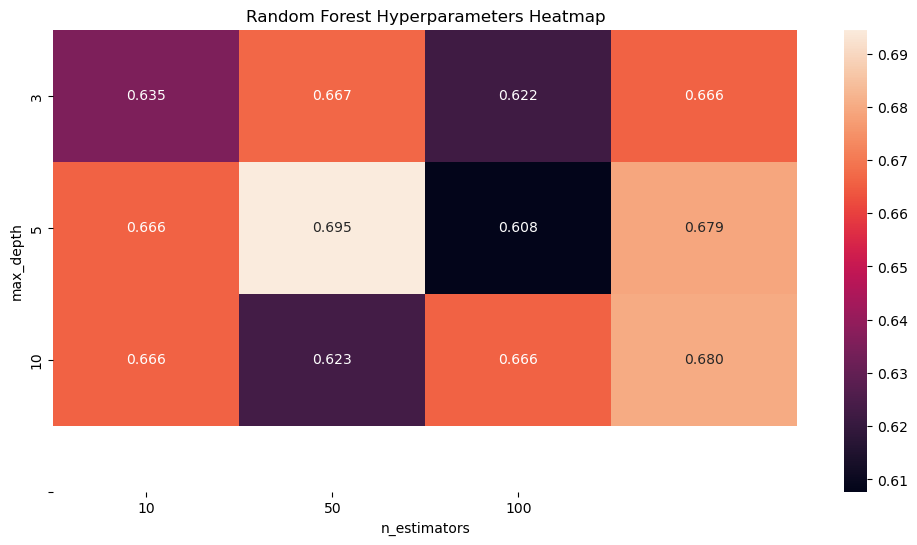

In [8]:
# Classifier configurations
classifiers = {
    'SVM': (SVC(), {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10, None]})
}

for classifier_name, (classifier, param_grid) in classifiers.items():
    for partition_name, test_size in partitions.items():
        X_train, X_test, y_train, y_test = train_test_split(
            data.drop('selector', axis=1), data['selector'], test_size=test_size, stratify=data['selector'], random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        accuracy, best_params = evaluate_classifier(
            classifier, param_grid, X_train_scaled, X_test_scaled, y_train, y_test, stratified_kfold, classifier_name)
        
        results['Classifier'].append(classifier_name)
        results['Partition'].append(partition_name)
        results['Accuracy'].append(accuracy)
        results['Best Parameters'].append(best_params)

In [9]:
# Converting results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

      Classifier Partition  Accuracy  \
0            SVM     20/80  0.724638   
1            SVM     50/50  0.658960   
2            SVM     80/20  0.619565   
3            KNN     20/80  0.753623   
4            KNN     50/50  0.589595   
5            KNN     80/20  0.572464   
6  Random Forest     20/80  0.724638   
7  Random Forest     50/50  0.705202   
8  Random Forest     80/20  0.615942   

                              Best Parameters  
0                {'C': 1, 'kernel': 'linear'}  
1                {'C': 1, 'kernel': 'linear'}  
2              {'C': 100, 'kernel': 'linear'}  
3  {'n_neighbors': 10, 'weights': 'distance'}  
4  {'n_neighbors': 10, 'weights': 'distance'}  
5  {'n_neighbors': 10, 'weights': 'distance'}  
6       {'max_depth': 10, 'n_estimators': 50}  
7       {'max_depth': 5, 'n_estimators': 100}  
8       {'max_depth': 5, 'n_estimators': 100}  
